In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from utils import *
from Network import *

%matplotlib notebook
import matplotlib.pyplot as plt

#hyperparams
output_seq_len = 4
input_sequence_length = 9
output_seq_len = 1
dim_val = 10
dim_attn = 10
lr = 0.005
epochs = 40
dim_attn = 5

n_decoder_layers = 3
n_encoder_layers = 3

In [16]:
#init network and optimizer
t = Transformer(dim_val, dim_attn, 1,  input_sequence_length, output_seq_len, n_decoder_layers, n_encoder_layers)
optimizer = torch.optim.Adam(t.parameters(), lr=lr)

#keep track of loss for graph
losses = []

<IPython.core.display.Javascript object>


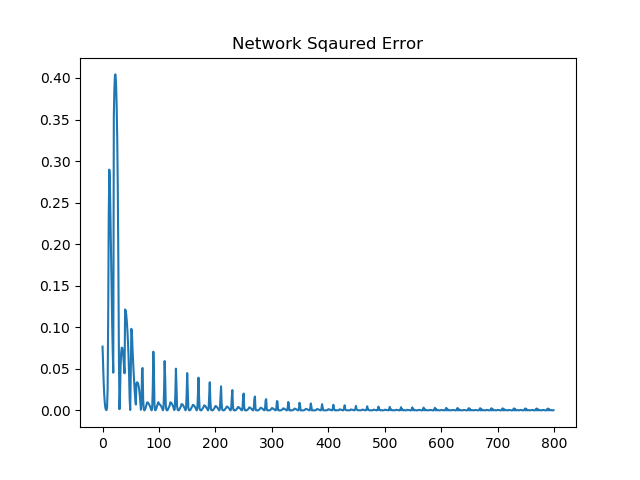

In [17]:
#build live matplotlib fig
fig = plt.figure()

ax = fig.add_subplot(111)

plt.ion()

fig.show()
fig.canvas.draw()

for e in range(epochs):
    out = []
    for b in range(-10- input_sequence_length, 10 - input_sequence_length):
        optimizer.zero_grad()
        
        #format data
        data = torch.sigmoid(torch.tensor(list(range(b, b + input_sequence_length + 1)), dtype = torch.float32))
        X = data[:input_sequence_length].unsqueeze(1)
        Y = data[input_sequence_length:]
        
        #Forward pass and calculate loss
        net_out = t(X)
        loss = (net_out - Y) ** 2

        #backwards pass
        loss.backward()
        optimizer.step()
        
        #Track losses and draw rgaph
        out.append([net_out.detach().numpy(), Y])
        losses.append(loss)
        
        ax.clear()
        ax.plot(losses)
        ax.set_title("Network Squared Error")
        fig.canvas.draw()
        


<IPython.core.display.Javascript object>


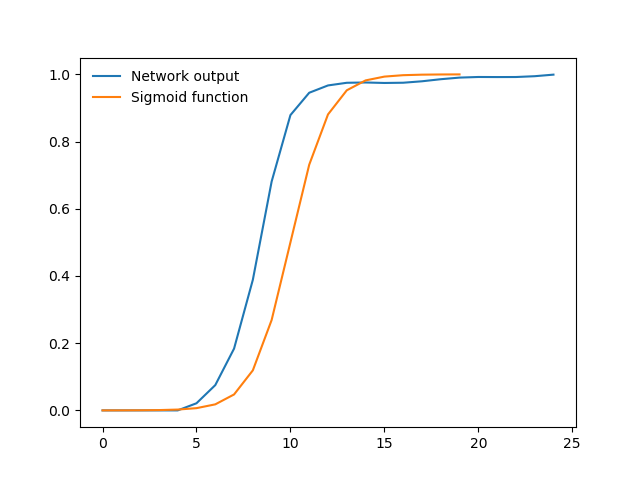

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

o = []
x = [[0.0]] * 5


for i in range(-10, 10):
    o.append([torch.sigmoid(torch.tensor(i).float())])
    x.append(t(torch.tensor(x).float()).detach().numpy())
    
ax.plot(x, label='Network output')
ax.plot(o, label='Sigmoid function')
ax.set_title("")
ax.legend(loc='upper left', frameon=False)


